In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv('train.csv')
Data.head(5)
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1744.00,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7104.0,1.213260e+00,4.096387e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7061.0,3.503254e+00,5.272229e-01,2.0,3.13,3.5,3.89,4.97
REG_FEE,7109.0,3.769383e+05,1.430707e+05,71177.0,272406.00,349486.0,451562.00,983922.00


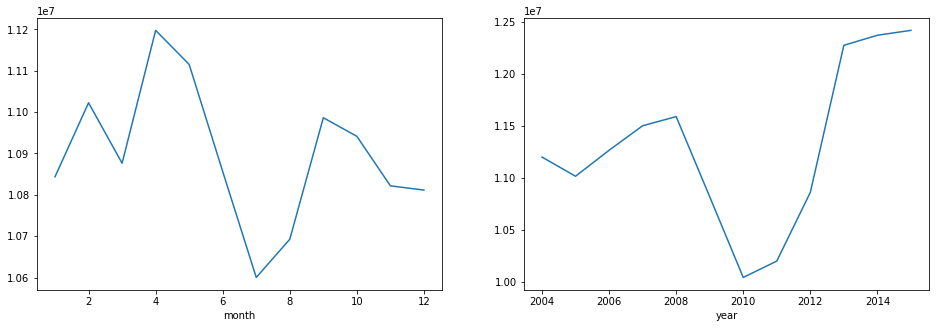

In [3]:
Data['date'] = pd.to_datetime(Data['DATE_SALE'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)
#data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['SALES_PRICE'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['SALES_PRICE'].plot()

In [4]:
Data.isnull().sum()
Data['N_BEDROOM']=Data['N_BEDROOM'].fillna(0)
Data['N_BATHROOM']=Data['N_BATHROOM'].fillna(0)
Data['QS_OVERALL']=Data['QS_OVERALL'].fillna(0)
Data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
date             0
month            0
year             0
dtype: int64

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   object        
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   float64       
 6   N_BATHROOM     7109 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   object        
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [6]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
Data['PRT_ID'] = lb.fit_transform(Data['PRT_ID'])
Data['AREA'] = lb.fit_transform(Data['AREA'])
Data['SALE_COND'] = lb.fit_transform(Data['SALE_COND'])
Data['PARK_FACIL'] = lb.fit_transform(Data['PARK_FACIL'])
Data['BUILDTYPE'] = lb.fit_transform(Data['BUILDTYPE'])
Data['UTILITY_AVAIL'] = lb.fit_transform(Data['UTILITY_AVAIL'])
Data['STREET'] = lb.fit_transform(Data['STREET'])
Data['MZZONE'] = lb.fit_transform(Data['MZZONE'])


In [7]:
Data = Data.drop('DATE_SALE',axis=1)
Data = Data.drop('DATE_BUILD',axis=1)

In [8]:
Data = Data.drop('date',axis=1)

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   int64  
 1   AREA           7109 non-null   int64  
 2   INT_SQFT       7109 non-null   int64  
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   float64
 5   N_BATHROOM     7109 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   int64  
 8   PARK_FACIL     7109 non-null   int64  
 9   BUILDTYPE      7109 non-null   int64  
 10  UTILITY_AVAIL  7109 non-null   int64  
 11  STREET         7109 non-null   int64  
 12  MZZONE         7109 non-null   int64  
 13  QS_ROOMS       7109 non-null   float64
 14  QS_BATHROOM    7109 non-null   float64
 15  QS_BEDROOM     7109 non-null   float64
 16  QS_OVERALL     7109 non-null   float64
 17  REG_FEE        7109 non-null   int64  
 18  COMMIS  

In [10]:
X = Data.drop('SALES_PRICE',axis =1).values
y = Data['SALES_PRICE'].values 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=101)

In [11]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [39]:
#from lightgbm import LGBMRegressor
#regressor = LGBMRegressor()  
#regressor.fit(X_train, y_train)

In [40]:
#from sklearn.ensemble import RandomForestRegressor
#regressor = RandomForestRegressor()  
#regressor.fit(X_train, y_train)

In [44]:
pip install catboost

     |████████████████████████████████| 67.3MB 62kB/s 


In [45]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()  
regressor.fit(X_train, y_train)

Learning rate set to 0.053183
0:	learn: 3580668.3253745	total: 50.9ms	remaining: 50.9s
1:	learn: 3430382.9508100	total: 54.6ms	remaining: 27.3s
2:	learn: 3284555.1379052	total: 59.8ms	remaining: 19.9s
3:	learn: 3150241.0147306	total: 63.3ms	remaining: 15.8s
4:	learn: 3039608.0116177	total: 67ms	remaining: 13.3s
5:	learn: 2919519.9295674	total: 70.4ms	remaining: 11.7s
6:	learn: 2806783.9461757	total: 73.8ms	remaining: 10.5s
7:	learn: 2701128.7145804	total: 77.1ms	remaining: 9.55s
8:	learn: 2599345.6092975	total: 80.4ms	remaining: 8.86s
9:	learn: 2497703.9622652	total: 83.8ms	remaining: 8.3s
10:	learn: 2404515.2625303	total: 87.4ms	remaining: 7.85s
11:	learn: 2314624.4552843	total: 90.8ms	remaining: 7.47s
12:	learn: 2232509.8975803	total: 94.4ms	remaining: 7.17s
13:	learn: 2151373.1308547	total: 97.7ms	remaining: 6.88s
14:	learn: 2073229.9344266	total: 101ms	remaining: 6.64s
15:	learn: 1997623.3049889	total: 104ms	remaining: 6.42s
16:	learn: 1938972.7765003	total: 108ms	remaining: 6.23s


In [28]:
#from xgboost import XGBRegressor
#regressor = XGBRegressor()  
#regressor.fit(X_train, y_train)

In [46]:
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


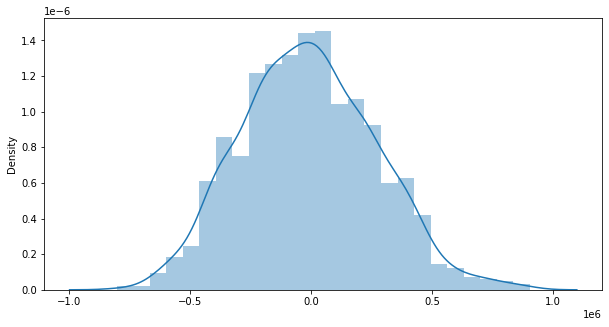

In [47]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [48]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)


,Actual,Predicted
0,18201340,1.857629e+07
1,7968600,8.184828e+06
2,11031970,1.155746e+07
3,15202400,1.477777e+07
4,7373000,7.714920e+06
5,13249450,1.346383e+07
6,14280890,1.455890e+07
7,8153390,8.004448e+06
8,13026640,1.308357e+07
9,12647660,1.252170e+07


In [51]:
from sklearn import metrics
print('MAE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)) )
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy:',metrics.explained_variance_score(y_test,y_pred)*100,'%')

MAE: 472.557731726626
RMSE: 277584.6004630194
Accuracy: 99.49572525484282 %


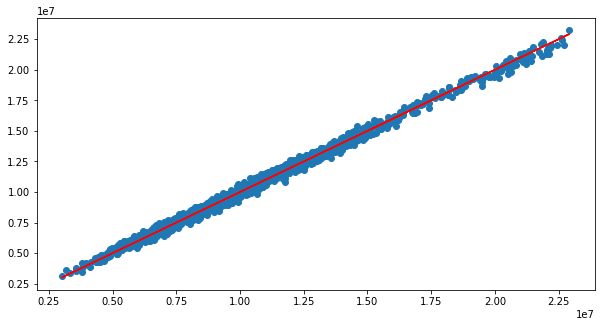

In [50]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

plt.plot(y_test,y_test,'r')